# NBA Teams Clustering

- Dataset: dataset_nba_team.csv

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Library Used

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.cluster import KMeans #  kmeans algorithm
from sklearn.metrics import silhouette_score # silhouette_score
from sklearn.decomposition import PCA #PCA
from sklearn.metrics import davies_bouldin_score #davis bouldin score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NBA Player Defense Clustering/dataset_nba_team.csv')
df

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1.0,Indiana Pacers,82.0,240.3,47.0,92.7,0.507,13.2,35.3,0.374,33.8,57.4,0.589,16.1,20.5,0.782,10.1,31.4,41.5,30.8,7.7,5.9,12.9,21.4,123.3
1,2.0,Boston Celtics,82.0,241.8,43.9,90.2,0.487,16.5,42.5,0.388,27.4,47.7,0.575,16.3,20.2,0.807,10.7,35.6,46.3,26.9,6.8,6.6,11.9,16.2,120.6
2,3.0,Oklahoma City Thunder,82.0,241.5,44.5,89.3,0.499,13.3,34.2,0.389,31.3,55.1,0.567,17.7,21.5,0.825,8.8,33.2,42.0,27.1,8.5,6.6,12.7,18.8,120.1
3,4.0,Milwaukee Bucks,82.0,241.5,43.1,88.5,0.487,14.2,38.1,0.373,29.0,50.4,0.574,18.5,23.9,0.774,9.4,34.8,44.2,26.5,6.8,5.0,12.9,19.2,119.0
4,5.0,Atlanta Hawks,82.0,242.1,43.0,92.5,0.465,13.7,37.7,0.364,29.3,54.8,0.535,18.5,23.2,0.797,12.5,32.2,44.7,26.6,7.5,4.5,13.5,18.6,118.3
5,6.0,Los Angeles Lakers,82.0,242.1,43.7,87.5,0.499,11.8,31.4,0.377,31.8,56.2,0.567,18.9,24.2,0.782,8.2,34.9,43.1,28.5,7.4,5.5,14.0,15.6,118.0
6,7.0,Dallas Mavericks,82.0,240.3,43.1,89.7,0.481,14.6,39.5,0.369,28.5,50.1,0.569,17.0,22.5,0.758,9.7,33.2,42.9,25.7,6.9,5.0,12.5,18.3,117.9
7,8.0,Golden State Warriors,82.0,241.8,43.7,91.6,0.477,14.8,38.9,0.380,28.9,52.7,0.548,15.6,20.0,0.780,12.1,34.6,46.7,29.3,7.0,4.6,14.3,19.5,117.8
8,9.0,Sacramento Kings,82.0,242.1,43.3,90.9,0.477,14.4,39.3,0.366,29.0,51.7,0.561,15.5,20.9,0.745,10.8,33.2,44.0,28.3,7.6,4.2,13.1,19.9,116.6
9,10.0,Phoenix Suns,82.0,241.2,42.5,86.1,0.493,12.4,32.6,0.382,30.0,53.6,0.561,18.9,23.4,0.808,10.1,33.9,44.1,27.0,7.4,6.0,14.9,18.0,116.2


## Preprocessing

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
Rk,1
Team,1
G,1
MP,1
FG,1
FGA,1
FG%,1
3P,1
3PA,1
3P%,1


In [ ]:
# drop null values
df.dropna(inplace=True)
df.isnull().sum()

,0
Rk,0
Team,0
G,0
MP,0
FG,0
FGA,0
FG%,0
3P,0
3PA,0
3P%,0


In [ ]:
df.columns

Index(['Rk', 'Team', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [ ]:
df = df [['Team', 'FG%', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']]
df.head(5)

,Team,FG%,FT%,TRB,AST,STL,BLK,TOV,PF,PTS
0,Indiana Pacers,0.507,0.782,41.5,30.8,7.7,5.9,12.9,21.4,123.3
1,Boston Celtics,0.487,0.807,46.3,26.9,6.8,6.6,11.9,16.2,120.6
2,Oklahoma City Thunder,0.499,0.825,42.0,27.1,8.5,6.6,12.7,18.8,120.1
3,Milwaukee Bucks,0.487,0.774,44.2,26.5,6.8,5.0,12.9,19.2,119.0
4,Atlanta Hawks,0.465,0.797,44.7,26.6,7.5,4.5,13.5,18.6,118.3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team    30 non-null     object 
 1   FG%     30 non-null     float64
 2   FT%     30 non-null     float64
 3   TRB     30 non-null     float64
 4   AST     30 non-null     float64
 5   STL     30 non-null     float64
 6   BLK     30 non-null     float64
 7   TOV     30 non-null     float64
 8   PF      30 non-null     float64
 9   PTS     30 non-null     float64
dtypes: float64(9), object(1)
memory usage: 2.6+ KB


In [ ]:
x = df.drop('Team', axis=1)
x.head(5)

,FG%,FT%,TRB,AST,STL,BLK,TOV,PF,PTS
0,0.507,0.782,41.5,30.8,7.7,5.9,12.9,21.4,123.3
1,0.487,0.807,46.3,26.9,6.8,6.6,11.9,16.2,120.6
2,0.499,0.825,42.0,27.1,8.5,6.6,12.7,18.8,120.1
3,0.487,0.774,44.2,26.5,6.8,5.0,12.9,19.2,119.0
4,0.465,0.797,44.7,26.6,7.5,4.5,13.5,18.6,118.3


## Data Preparation

In [ ]:
# Standarization
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled[0]

array([ 1.96661121, -0.08439006, -1.4262726 ,  2.26300076,  0.40926   ,
        0.96415821, -0.66820924,  2.07209388,  2.17051862])

In [ ]:
# PCA 2 n_components
PCA = PCA(n_components=2)
x_pca = PCA.fit_transform(x_scaled)
x_pca[0]

array([3.03114767, 2.08657319])

In [ ]:
# Elbow method
wcss = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i, random_state= 42)
  kmeans.fit(x_pca)
  wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method')

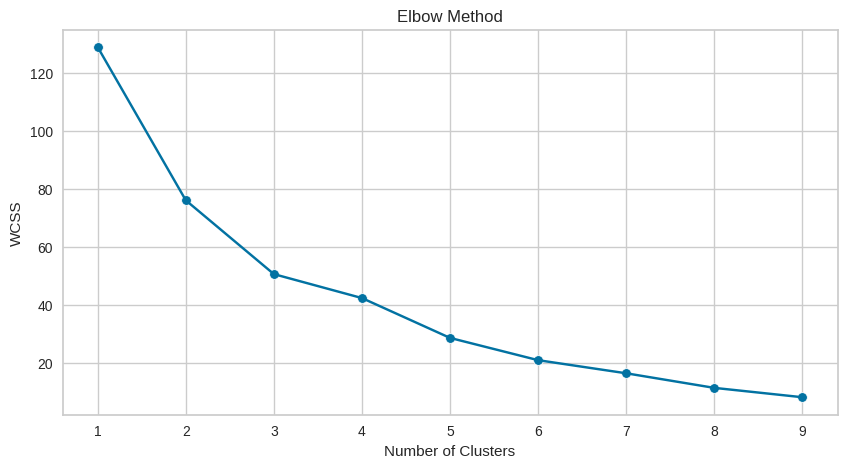

In [ ]:
plt.figure(figsize=(10,5))
n = range(1,10)

sns.lineplot(
    x = n,
    y = wcss
)

sns.scatterplot(
    x = n,
    y = wcss
)

plt.xticks = n
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

## Dapat dilihat jika menggunakan elbow method jumlah k optimal adalah 3

In [ ]:
# Silhouette Method

silhouette_scores = []
for i in range(2,10):
  kmeans = KMeans(n_clusters=i, random_state= 42)
  kmeans.fit(x_pca)
  labels = kmeans.labels_
  silhouette_scores.append(silhouette_score(x_pca, labels))

Text(0.5, 1.0, 'Silhouette Method')

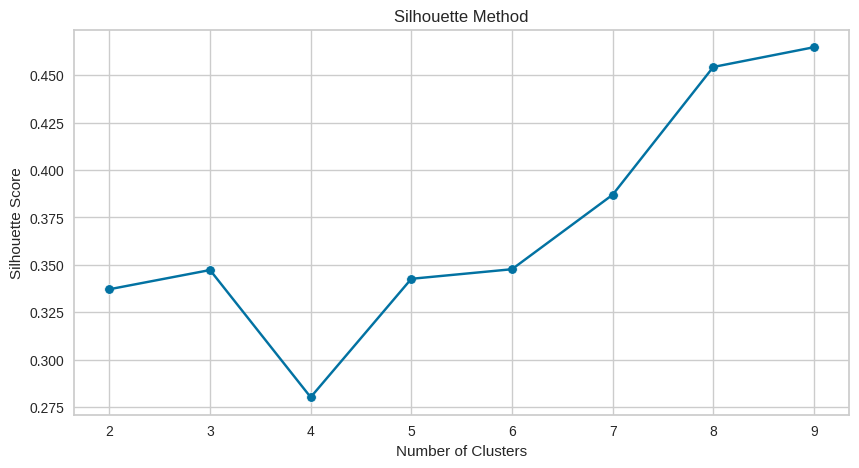

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(
    x = range(2,10),
    y = silhouette_scores
)
sns.scatterplot(
    x = range(2,10),
    y = silhouette_scores
)

plt.xticks = range(2,10)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')

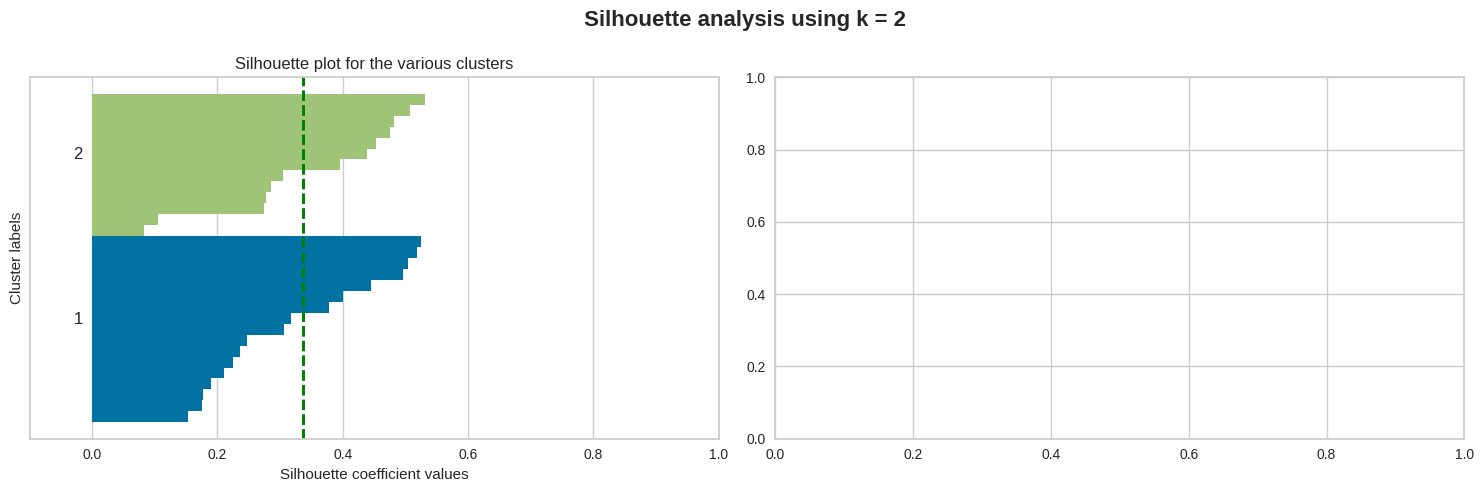

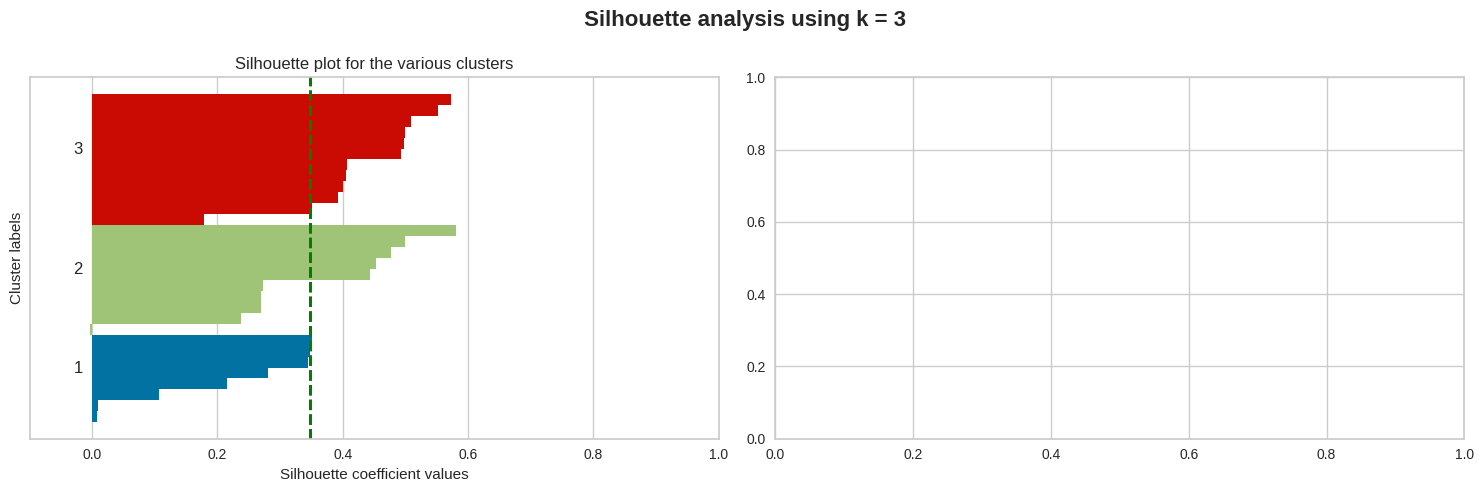

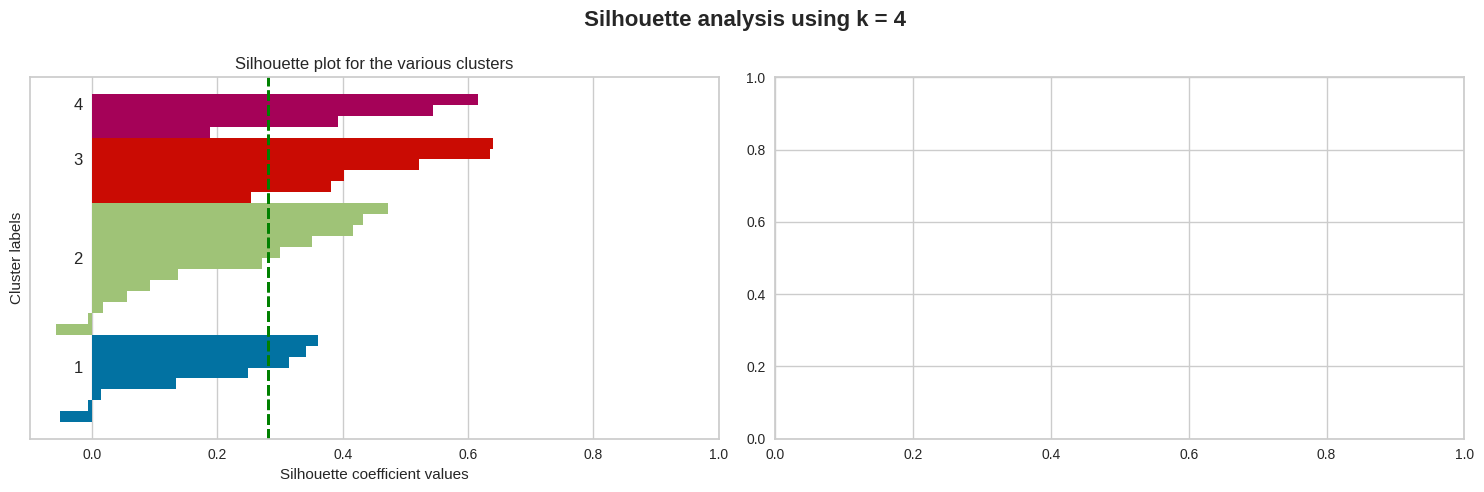

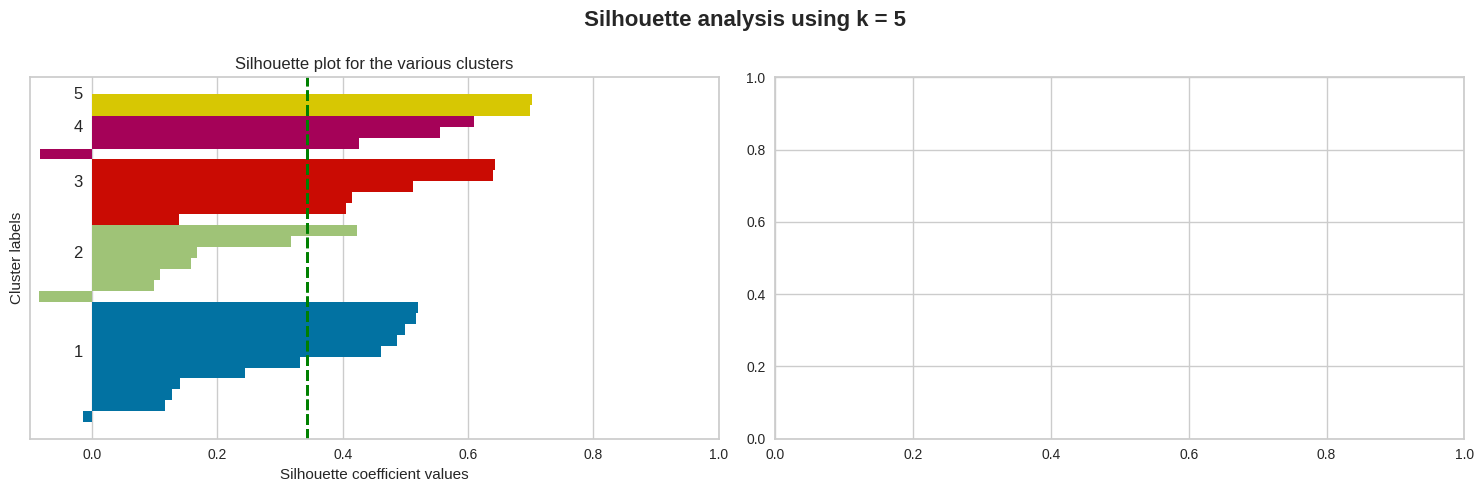

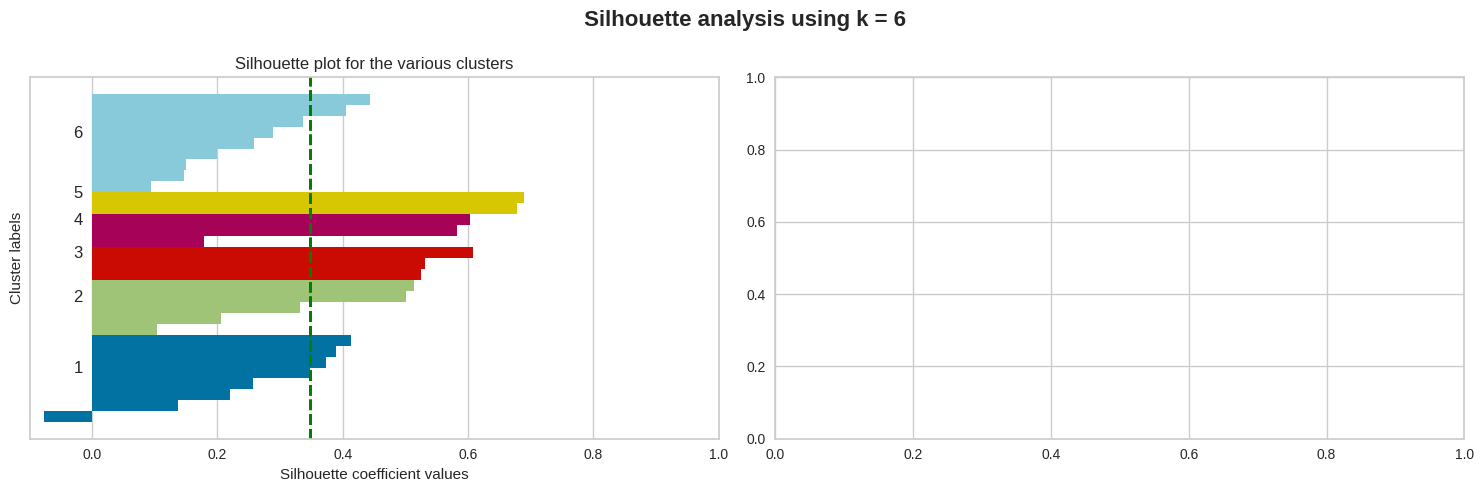

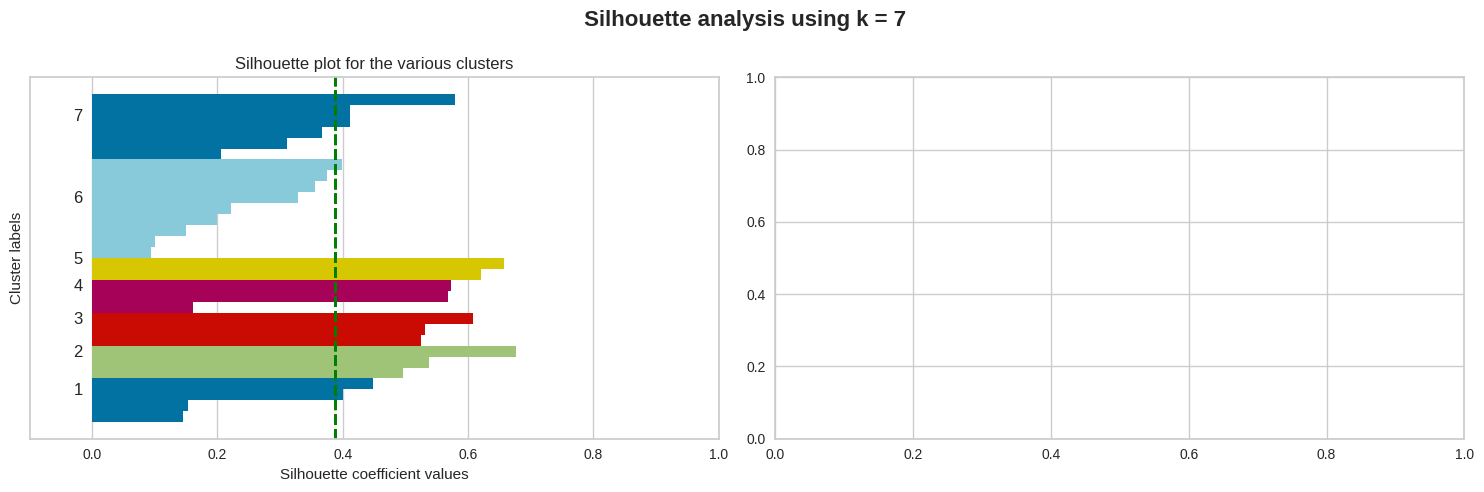

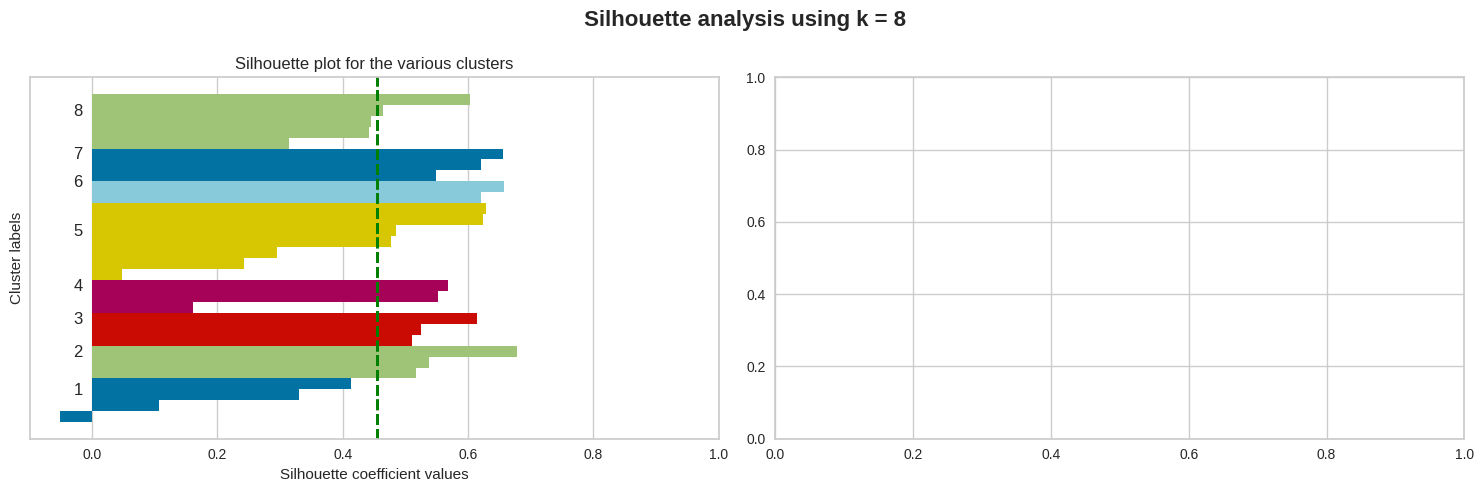

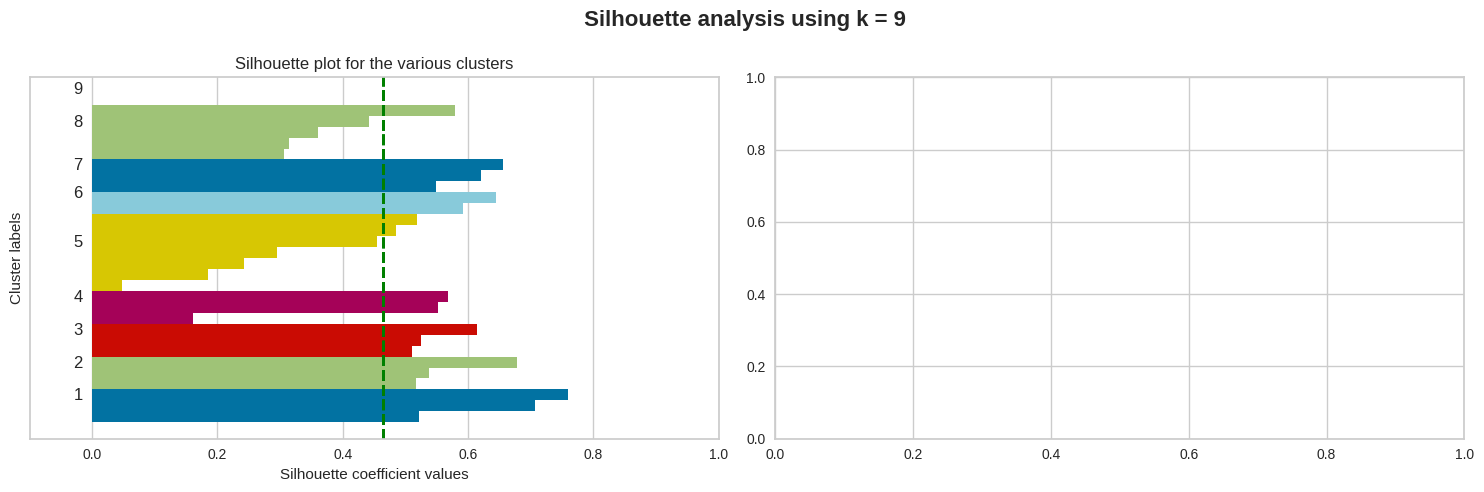

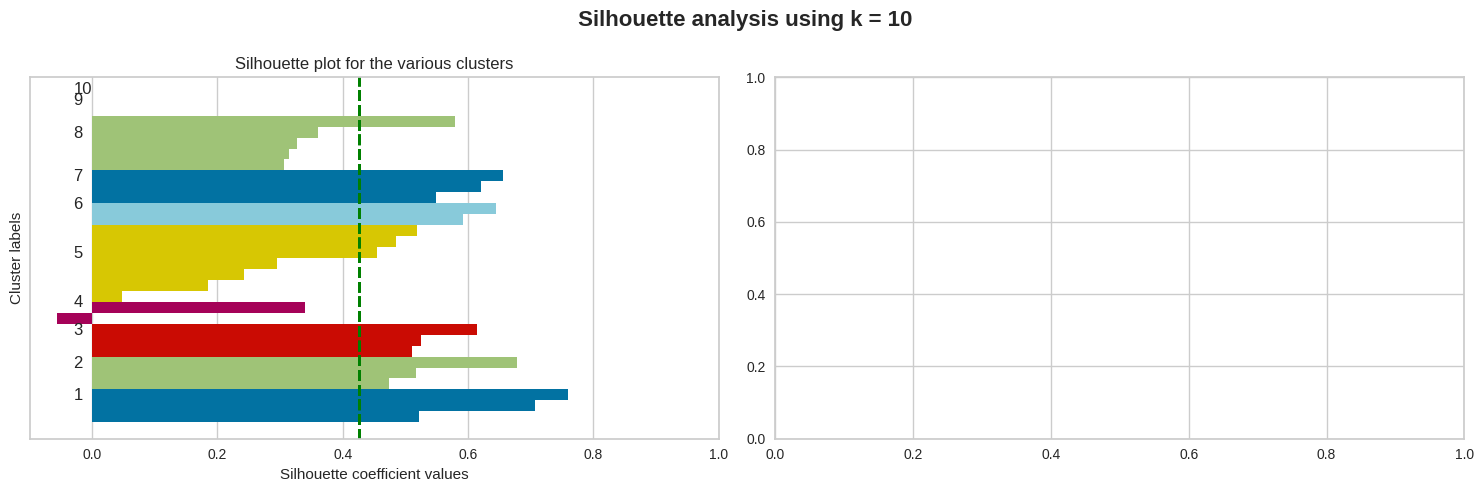

In [ ]:
from sklearn.metrics import silhouette_samples
for i,k in enumerate([2,3,4,5,6,7,8,9,10]):

    fig, ax = plt.subplots(1,2,figsize=(15,5))
    # Run the kmeans algorithm
    km = KMeans(n_clusters=k, random_state=42)
    y_predict = km.fit_predict(x_pca)
    centroids  = km.cluster_centers_
    # get silhouette
    silhouette_vals = silhouette_samples(x_pca,y_predict)
        #silhouette_vals
    # silhouette plot
    y_ticks = []
    y_lower = y_upper = 0
    for i,cluster in enumerate(np.unique(y_predict)):
      cluster_silhouette_vals = silhouette_vals[y_predict ==cluster]
      cluster_silhouette_vals.sort()
      y_upper += len(cluster_silhouette_vals)

      ax[0].barh(range(y_lower,y_upper),
      cluster_silhouette_vals,height =1);
      ax[0].text(-0.03,(y_lower+y_upper)/2,str(i+1))
      y_lower += len(cluster_silhouette_vals)

      # Get the average silhouette score
      avg_score = np.mean(silhouette_vals)
      ax[0].axvline(avg_score,linestyle ='--',
      linewidth =2,color = 'green')
      ax[0].set_yticks([])
      ax[0].set_xlim([-0.1, 1])
      ax[0].set_xlabel('Silhouette coefficient values')
      ax[0].set_ylabel('Cluster labels')
      ax[0].set_title('Silhouette plot for the various clusters')

      plt.tight_layout()
      plt.suptitle(f' Silhouette analysis using k = {k}',fontsize=16,fontweight = 'semibold')

## Dapat dilihat bahwa k optimal adalah 3

In [ ]:
# Davis Bouldin Index
davis = []
for i in range(2,10):
  kmeans = KMeans(n_clusters=i, random_state= 42, init='k-means++')
  kmeans.fit(x_pca)
  labels = kmeans.labels_
  davis.append(davies_bouldin_score(x_pca, labels))

Text(0.5, 1.0, 'Davis Bouldin Index Method')

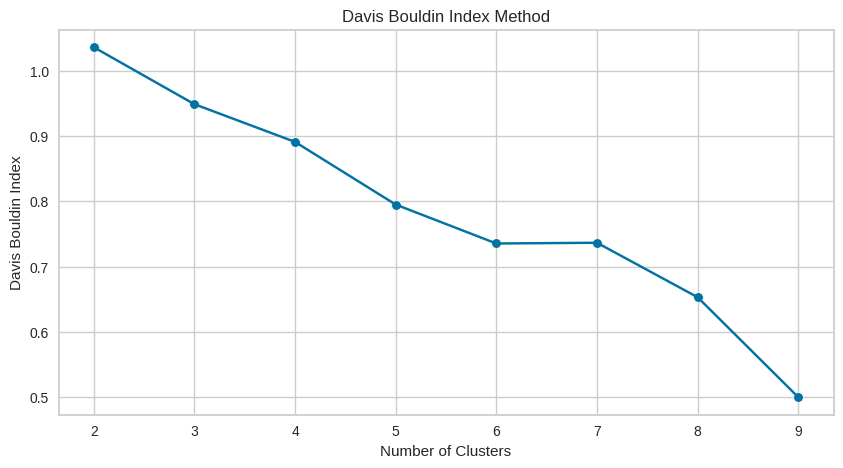

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(
    x = range(2,10),
    y = davis
)
sns.scatterplot(
    x = range(2,10),
    y = davis
)

plt.xticks = range(2,10)
plt.xlabel('Number of Clusters')
plt.ylabel('Davis Bouldin Index')
plt.title('Davis Bouldin Index Method')

### Dapat dilihat bahwa k optimal adalah 6

In [ ]:
# Kmeans
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(x_pca)

KMeans(n_clusters=9, random_state=42)

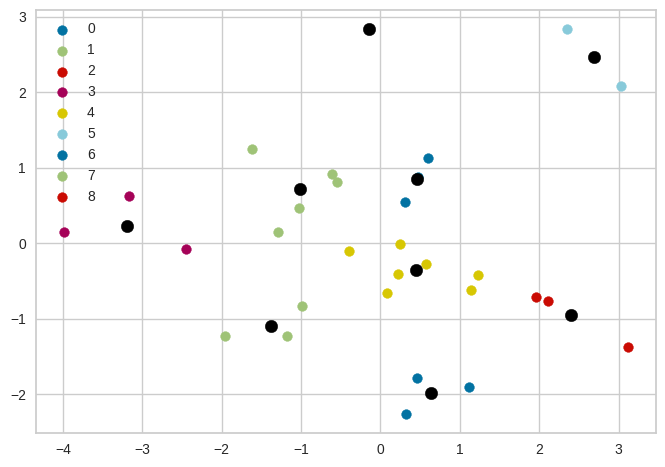

In [ ]:
# Plotting Kmeans model with centroid
u_labels = np.unique(kmeans.labels_)

for i in u_labels:
    plt.scatter(x_pca[kmeans.labels_ == i , 0] , x_pca[kmeans.labels_ == i , 1] , label = i)
#centroid
plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1] , s = 80, color = 'black')
plt.legend()
plt.show()

In [ ]:
# insert the centroid to df dataframe
df['cluster'] = kmeans.labels_
df

<ipython-input-261-959ef24c854f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.labels_


,Team,FG%,FT%,TRB,AST,STL,BLK,TOV,PF,PTS,cluster
0,Indiana Pacers,0.507,0.782,41.5,30.8,7.7,5.9,12.9,21.4,123.3,5
1,Boston Celtics,0.487,0.807,46.3,26.9,6.8,6.6,11.9,16.2,120.6,2
2,Oklahoma City Thunder,0.499,0.825,42.0,27.1,8.5,6.6,12.7,18.8,120.1,5
3,Milwaukee Bucks,0.487,0.774,44.2,26.5,6.8,5.0,12.9,19.2,119.0,4
4,Atlanta Hawks,0.465,0.797,44.7,26.6,7.5,4.5,13.5,18.6,118.3,4
5,Los Angeles Lakers,0.499,0.782,43.1,28.5,7.4,5.5,14.0,15.6,118.0,2
6,Dallas Mavericks,0.481,0.758,42.9,25.7,6.9,5.0,12.5,18.3,117.9,4
7,Golden State Warriors,0.477,0.780,46.7,29.3,7.0,4.6,14.3,19.5,117.8,6
8,Sacramento Kings,0.477,0.745,44.0,28.3,7.6,4.2,13.1,19.9,116.6,4
9,Phoenix Suns,0.493,0.808,44.1,27.0,7.4,6.0,14.9,18.0,116.2,4
